<a href="https://colab.research.google.com/github/Teacher-Heiko/fashion-mnist/blob/master/Final_Heiko_Fashion_MNIST_training_loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The goal is predict whether a picture is a bag and not a sneaker.**

**And to do this from scratch using pure Python with only sparingly using Numpy or Pytorch or fastai.**

Based on chapter 4 of fastbook 04_mnist_basics.ipynp

***Load repository and dataset***

In [1]:
# Credit: Google search
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Credit: Google search
!git clone https://github.com/zalandoresearch/fashion-mnist

fatal: destination path 'fashion-mnist' already exists and is not an empty directory.


In [3]:
# Credit: StackOverflow
import sys
sys.path.append('fashion-mnist/utils')

In [4]:
# Credit: Github of Fashion MNIST Readme, see above link
import mnist_reader # from utils folder
X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [5]:
type(X_train)

numpy.ndarray

**START of experimentation phase**

***Prepare images of bags; label 8***

In [6]:
# eights = []
# for index in range(len(y_train)) :
#   if y_train[index] == 8 :
#     eights.append(index)

# len(eights)

In [7]:
# images = [X_train[i] for i in eights]
# len(images)

In [8]:
# import numpy as np
# imgs_8 = np.array(images)

In [9]:
# Credit: ChatGPT
import numpy as np
import matplotlib.pyplot as plt

def display_random_images(X, y, num_images=5):
    """
    Display random images from the given dataset along with their labels.

    Parameters:
    - X: The dataset containing images.
    - y: The corresponding labels.
    - num_images: Number of random images to display (default is 5).
    """
    # Generate random indices to select random images
    random_indices = np.random.randint(0, len(X), num_images)

    # Create a grid of subplots to display the images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i, idx in enumerate(random_indices):
        # Display the image
        axes[i].imshow(X[idx].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {y[idx]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

In [10]:
# display_random_images(imgs_8, [8]*6000, num_images=10)

In [11]:
# imgs_8.shape

In [12]:
# import torch
# eights_tens = torch.tensor(imgs_8)
# eights_tens.shape

In [13]:
# sevens_tens = torch.tensor(imgs_7).view(-1, 28*28)
# sevens_tens.shape

In [14]:
# stacked_tens = torch.stack([eights_tens,sevens_tens]).float()/255
# stacked_tens = stacked_tens.view(-1, 28*28)
# stacked_tens.shape

In [15]:
# display_random_images(stacked_tens, [7]*len(stacked_tens), num_images=10)

In [16]:
# train_x = stacked_tens
# train_x.shape

In [17]:
# from fastai.vision.all import *
# train_x = torch.cat([eights_tens, sevens_tens])
# train_x.shape


***Bags are 1 and Sneakers are 0; for probability calculation***

In [18]:
# train_y = torch.tensor([1]*len(eights) + [0]*len(sevens)).unsqueeze(1)
# train_x.shape,train_y.shape

In [19]:
# len(train_y)

**END of experimentation phase**

***Function to prepare tensors***

In [20]:
# Credit: Heiko
import numpy as np
import torch

def prepare_tensors(X,y, label) :
  """
  X = training or validation set
  y = label set
  label = Fashion MNIST label e.g. 8 means bags
  """
  indices = []
  for index in range(len(y)) :
    if y[index] == label :
      indices.append(index)

  images = np.array([X[i] for i in indices])


  return torch.tensor(images).view(-1,28*28)

In [21]:
eight_tens = prepare_tensors(X_train, y_train, 8)
eight_tens.shape

torch.Size([6000, 784])

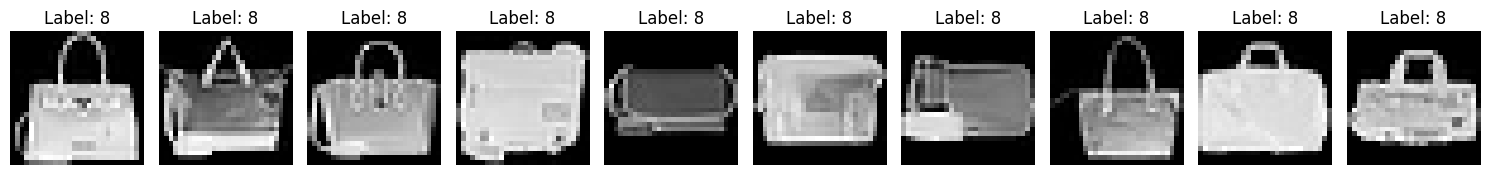

In [22]:
display_random_images(eight_tens, [8]*len(eight_tens), num_images=10)

In [23]:
seven_tens = prepare_tensors(X_train, y_train, 7)
seven_tens.shape

torch.Size([6000, 784])

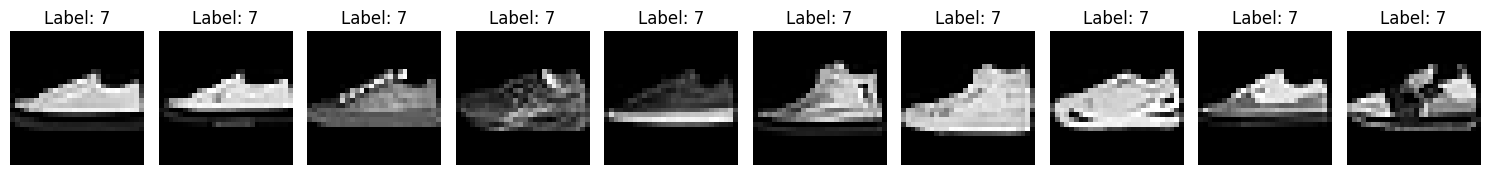

In [24]:
display_random_images(seven_tens, [7]*len(seven_tens), num_images=10)

***Normalize***

In [25]:
eight_tens = eight_tens.float()/255
seven_tens = seven_tens.float()/255
eight_tens.shape, seven_tens.shape

(torch.Size([6000, 784]), torch.Size([6000, 784]))

In [26]:
import torch
train_x = torch.cat([eight_tens, seven_tens])
train_x.shape

torch.Size([12000, 784])

***Prepare labels***

***Bags are 1 and Sneakers are 0; for probability calculation***

In [27]:
train_y = torch.tensor([1]*len(eight_tens) + [0]*len(seven_tens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12000, 784]), torch.Size([12000, 1]))

***Prepare training set tuple***

In [28]:
train_dset = list(zip(train_x,train_y))
len(train_dset)

12000

***Use Dataloader to create batches***

In [29]:
from fastai.vision.all import *
dl = DataLoader(train_dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

*** Trying to do the same thing with only standard Python generator***

In [30]:
# def data_loader(dataset, batch_size=256):
#     """Generator to yield batches of data."""
#     length = len(dataset)
#     for idx in range(0, length, batch_size):
#         batch = dataset[idx:min(idx + batch_size, length)]
#         images, labels = zip(*batch)
#         images_tensor = torch.stack(images)
#         current_batch_size = len(labels) # for batches that are less than batch_size
#         yield images_tensor, torch.tensor(labels).view(current_batch_size, -1)

In [31]:
# dl = data_loader(train_dset, batch_size=256)
# xb,yb = first(dl)
# xb.shape,yb.shape

***Repeat above steps for validation/test set***

In [32]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

In [33]:
valid_eight_tens = prepare_tensors(X_test, y_test, 8)
valid_eight_tens.shape

torch.Size([1000, 784])

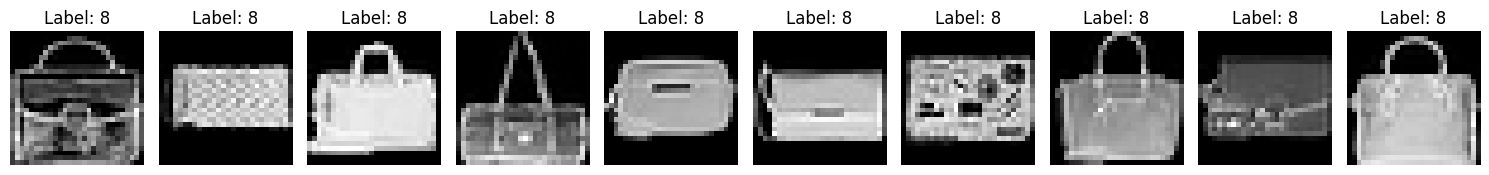

In [34]:
display_random_images(valid_eight_tens, [8]*len(valid_eight_tens), num_images=10)

In [35]:
valid_seven_tens = prepare_tensors(X_test, y_test, 7)
valid_seven_tens.shape

torch.Size([1000, 784])

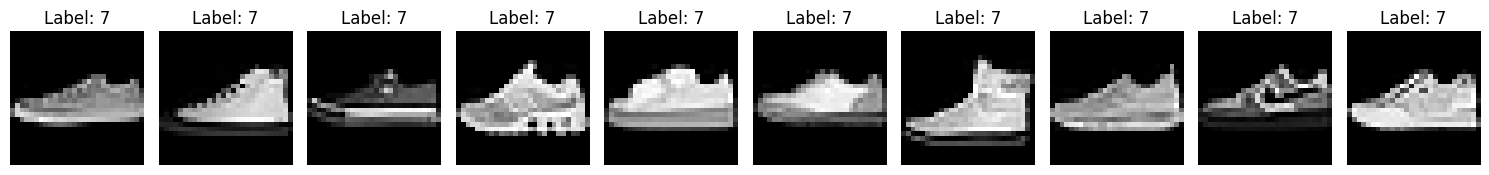

In [36]:
display_random_images(valid_seven_tens, [7]*len(valid_seven_tens), num_images=10)

In [37]:
valid_eight_tens = valid_eight_tens.float()/255
valid_seven_tens = valid_seven_tens.float()/255
valid_eight_tens.shape, valid_seven_tens.shape

(torch.Size([1000, 784]), torch.Size([1000, 784]))

In [38]:
test_x = torch.cat([valid_eight_tens, valid_seven_tens])
test_x.shape

torch.Size([2000, 784])

In [39]:
test_y = tensor([1]*len(valid_eight_tens) + [0]*len(valid_seven_tens)).unsqueeze(1)
test_x.shape,test_y.shape

(torch.Size([2000, 784]), torch.Size([2000, 1]))

In [40]:
test_dset = list(zip(test_x,test_y))
len(test_dset)

2000

In [41]:
valid_dl = DataLoader(test_dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

***Prepare training loop***

In [42]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [43]:
weights = init_params((28*28,1))

In [44]:
bias = init_params(1)

In [45]:
(train_x[0]*weights.T).sum() + bias

tensor([-8.7457], grad_fn=<AddBackward0>)

In [46]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ -8.7457],
        [-22.8309],
        [-18.2256],
        ...,
        [ -6.3686],
        [ -7.3420],
        [-10.2154]], grad_fn=<AddBackward0>)

In [47]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [48]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [49]:
preds = linear1(batch)
preds

tensor([[ -8.7457],
        [-22.8309],
        [-18.2256],
        [-23.4894]], grad_fn=<AddBackward0>)

In [50]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [51]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(1.0000, grad_fn=<MeanBackward0>)

In [52]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [53]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [54]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [55]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [56]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [57]:
validate_epoch(linear1)

0.5002

In [58]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [59]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.5111

In [60]:
for i in range(10):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.5127 0.5127 0.5122 0.5122 0.5127 0.5127 0.5127 0.5132 0.5132 0.5132 

***NOTE that if at this step the accuraccy does not improve you messed up and should restart your Runtime***

In [61]:
def train_model(model, epochs, lr, params):
    for i in range(epochs):
        train_epoch(model, lr, params)
        print(validate_epoch(model), end=' ')

In [62]:
train_model(linear1, 10, lr, params)

0.5137 0.5142 0.5151 0.5156 0.6509 0.8265 0.8998 0.9301 0.9511 0.9594 

***Now try a simple non-linear neural network***

In [63]:
def init_params(size, std=1.0): return (torch.randn(size) * std).requires_grad_()

def simple_net(xb):
    res = xb @ w1 + b1                # Input Layer (784 neurons)
    res = res.max(torch.tensor(0.0))  # Activation Function (ReLU) applied element-wise
    res = res @ w2 + b2               # Output Layer (1 neuron)
    return res

In [64]:
w1 = init_params((28 * 28, 30))  # Weight matrix connecting 784 input neurons to 30 neurons
b1 = init_params(30)             # Biases for the 30 neurons in the Activation Function layer
w2 = init_params((30, 1))        # Weight matrix connecting 30 neurons to 1 output neuron
b2 = init_params(1)              # Bias for the output neuron

(28 * 28, 30): This is a tuple specifying the dimensions of the weight matrix. In neural networks, the weight matrix for a layer has dimensions (number of neurons in the current layer, number of neurons in the next layer). Here, it means that there are 28 * 28 (784) input neurons in the input layer, and these are connected to 30 neurons in the next layer.

In [65]:
lr = 1.
params = [w1, b1, w2, b2]
train_epoch(simple_net, lr, params)
validate_epoch(simple_net)

0.6235

In [66]:
train_model(simple_net, 40, lr, params)

0.8091 0.8696 0.9077 0.9292 0.9409 0.9546 0.9604 0.9688 0.9707 0.9731 0.979 0.9814 0.9839 0.9868 0.9878 0.9888 0.9888 0.9888 0.9897 0.9902 0.9902 0.9907 0.9912 0.9912 0.9912 0.9917 0.9922 0.9922 0.9922 0.9927 0.9927 0.9927 0.9932 0.9932 0.9932 0.9937 0.9937 0.9941 0.9941 0.9941 

***Homework : Make a prediction of a random image whether it is a bag or not a bag***
